In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from redist import modifier
import ksnunu_utils

from Bayesian_pyhf import plotting
import arviz as az
import corner

In [2]:
null = ksnunu_utils.null_pred()
alt = ksnunu_utils.alt_pred()

In [3]:
model, alt_yields = modifier.load('ksnunu_model.json', alt.distribution, null.distribution, return_data=True)

## Load and plot samples

In [4]:
post_data = az.from_json( '../samples/ksnunu_post_data.json')
post_pred = az.from_json( '../samples/ksnunu_post_pred.json')
prior_pred = az.from_json('../samples/ksnunu_prior_pred.json')

In [5]:
post_data.posterior

<xarray.Dataset>
Dimensions:                      (chain: 4, draw: 10000, csr_dim_0: 1,
                                  FFKs_decorrelated[0]_dim_0: 1,
                                  FFKs_decorrelated[1]_dim_0: 1,
                                  FFKs_decorrelated[2]_dim_0: 1,
                                  FFKs_decorrelated[3]_dim_0: 1,
                                  FFKs_decorrelated[4]_dim_0: 1,
                                  ...
                                  FFKs_decorrelated[10]_dim_0: 1,
                                  FFKs_decorrelated[11]_dim_0: 1,
                                  FFKs_decorrelated[12]_dim_0: 1,
                                  FFKs_decorrelated[13]_dim_0: 1, mu_dim_0: 1,
                                  stat_dim_0: 10, cvl_dim_0: 1, cvr_dim_0: 1,
                                  csl_dim_0: 1, ctl_dim_0: 1)
Coordinates: (12/23)
  * chain                        (chain) int64 0 1 2 3
  * draw                         (draw) int64 0 1 2 3 4 ... 9996 9997 9998 9999
  * csr_dim_0                    (csr_dim_0) int64 0
  * FFKs_decorrelated[0]_dim_0   (FFKs_decorrelated[0]_dim_0) int64 0
  * FFKs_decorrelated[1]_dim_0   (FFKs_decorrelated[1]_dim_0) int64 0
  * FFKs_decorrelated[2]_dim_0   (FFKs_decorrelated[2]_dim_0) int64 0
    ...                           ...
  * mu_dim_0                     (mu_dim_0) int64 0
  * stat_dim_0                   (stat_dim_0) int64 0 1 2 3 4 5 6 7 8 9
  * cvl_dim_0                    (cvl_dim_0) int64 0
  * cvr_dim_0                    (cvr_dim_0) int64 0
  * csl_dim_0                    (csl_dim_0) int64 0
  * ctl_dim_0                    (ctl_dim_0) int64 0
Data variables: (12/21)
    csr                          (chain, draw, csr_dim_0) float64 -1.127e-10 ...
    FFKs_decorrelated[0]         (chain, draw, FFKs_decorrelated[0]_dim_0) float64 ...
    FFKs_decorrelated[1]         (chain, draw, FFKs_decorrelated[1]_dim_0) float64 ...
    FFKs_decorrelated[2]         (chain, draw, FFKs_decorrelated[2]_dim_0) float64 ...
    FFKs_decorrelated[3]         (chain, draw, FFKs_decorrelated[3]_dim_0) float64 ...
    FFKs_decorrelated[4]         (chain, draw, FFKs_decorrelated[4]_dim_0) float64 ...
    ...                           ...
    mu                           (chain, draw, mu_dim_0) float64 1.0 1.0 ... 1.0
    stat                         (chain, draw, stat_dim_0) float64 1.011 ... ...
    cvl                          (chain, draw, cvl_dim_0) float64 4.954 ... 4...
    cvr                          (chain, draw, cvr_dim_0) float64 1.096 ... 1...
    csl                          (chain, draw, csl_dim_0) float64 1.125 ... 0...
    ctl                          (chain, draw, ctl_dim_0) float64 1.008 ... 1...
Attributes:
    created_at:                 2023-12-10T09:01:05.185053
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.10.0
    sampling_time:              1791.9343922138214
    tuning_steps:               2000

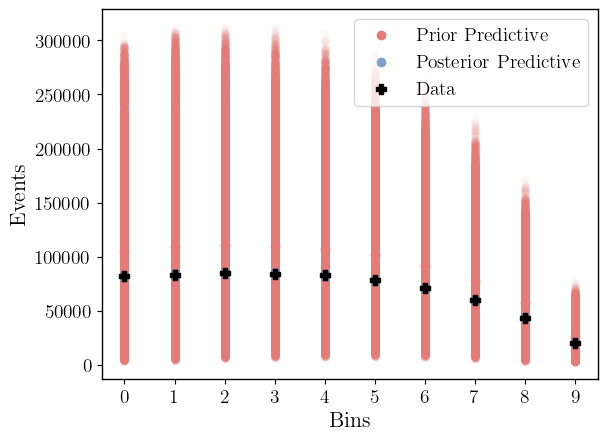

In [6]:
plotting.prior_posterior_predictives(model=model, data=alt_yields, post_pred=post_pred, prior_pred=prior_pred)
plt.show()

/home/lorenz/venv_redist/lib/python3.10/site-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (21), generating only 20 plots
  warnings.warn(


array([[<Axes: title={'center': 'cvl'}>, <Axes: title={'center': 'cvl'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[9]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[9]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[0]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[0]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[5]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[5]'}>],
       [<Axes: title={'center': 'stat'}>,
        <Axes: title={'center': 'stat'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[7]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[7]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[2]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[2]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[3]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[3]'}>],
       [<Axes: title={'center': 'FFKs_decorrelated[8]'}>,
        <Axes: title={'center': 'FFKs_decorrelated[8]'}>],
       [<Axes: title=

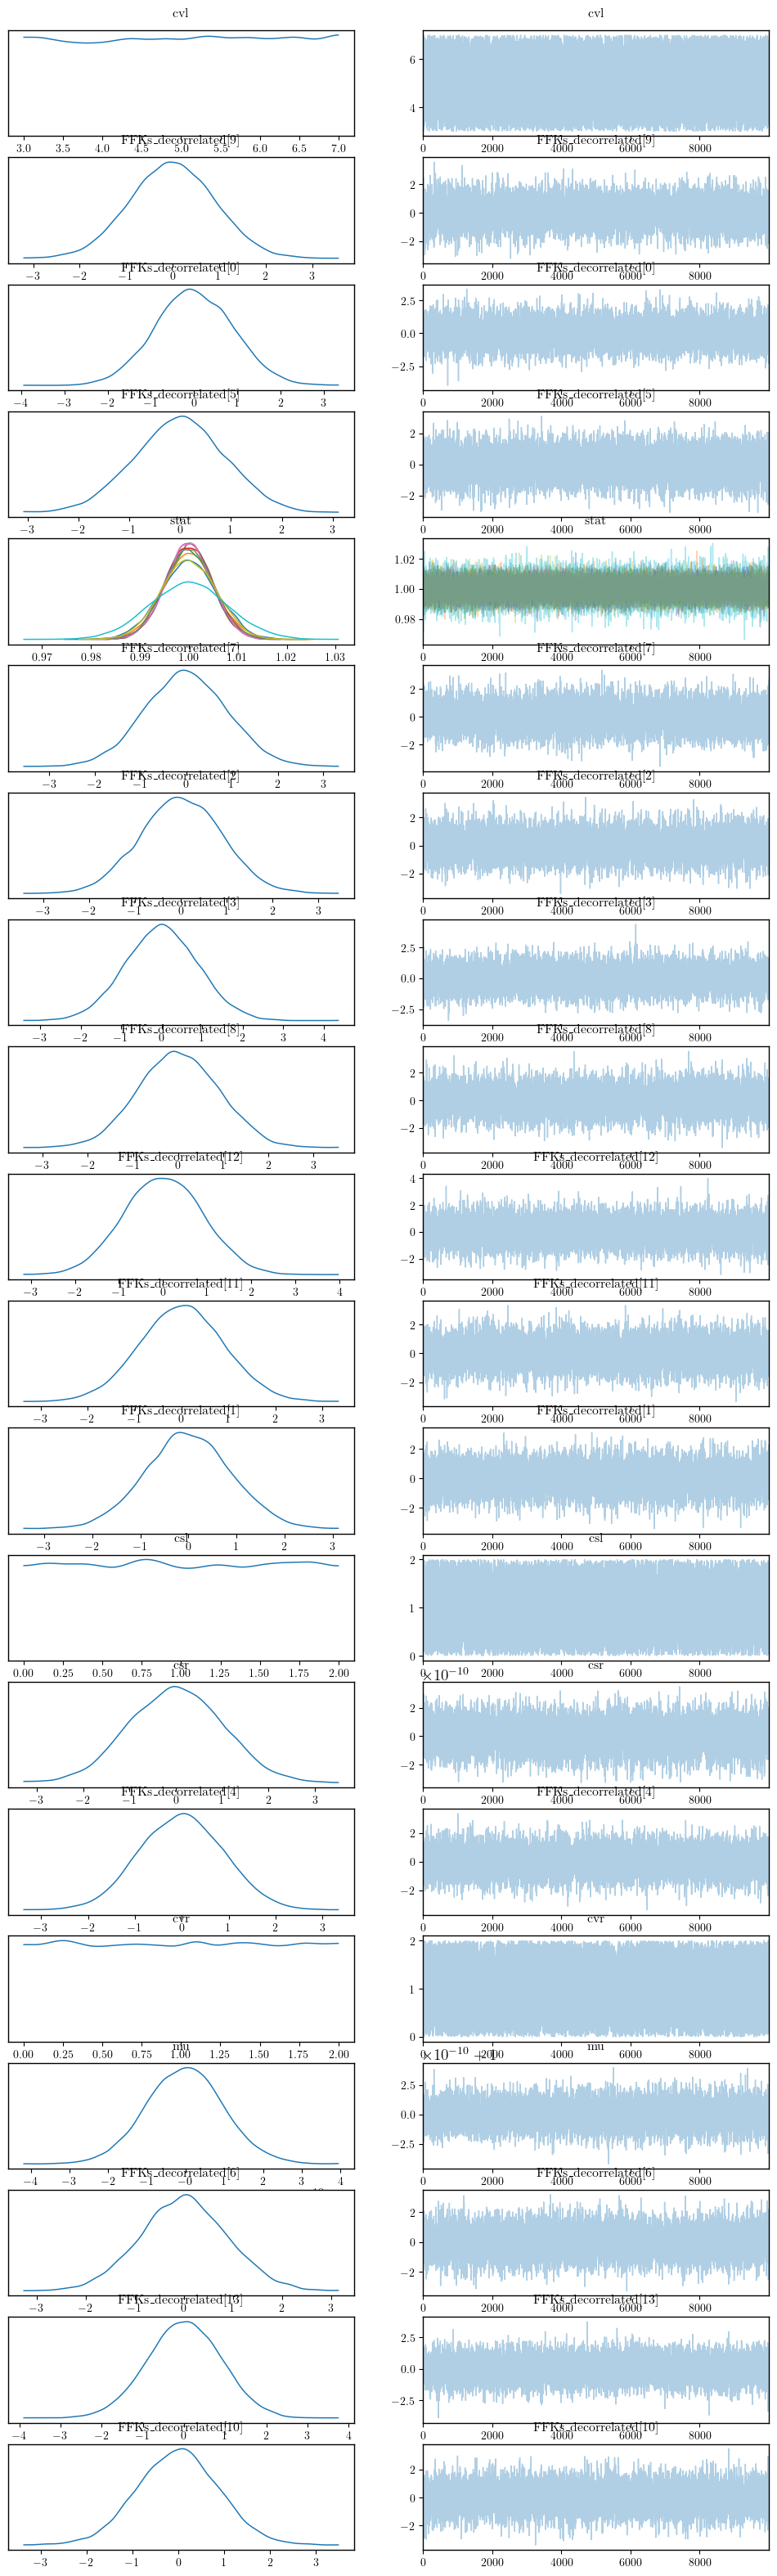

In [7]:
az.plot_trace(prior_pred.prior)

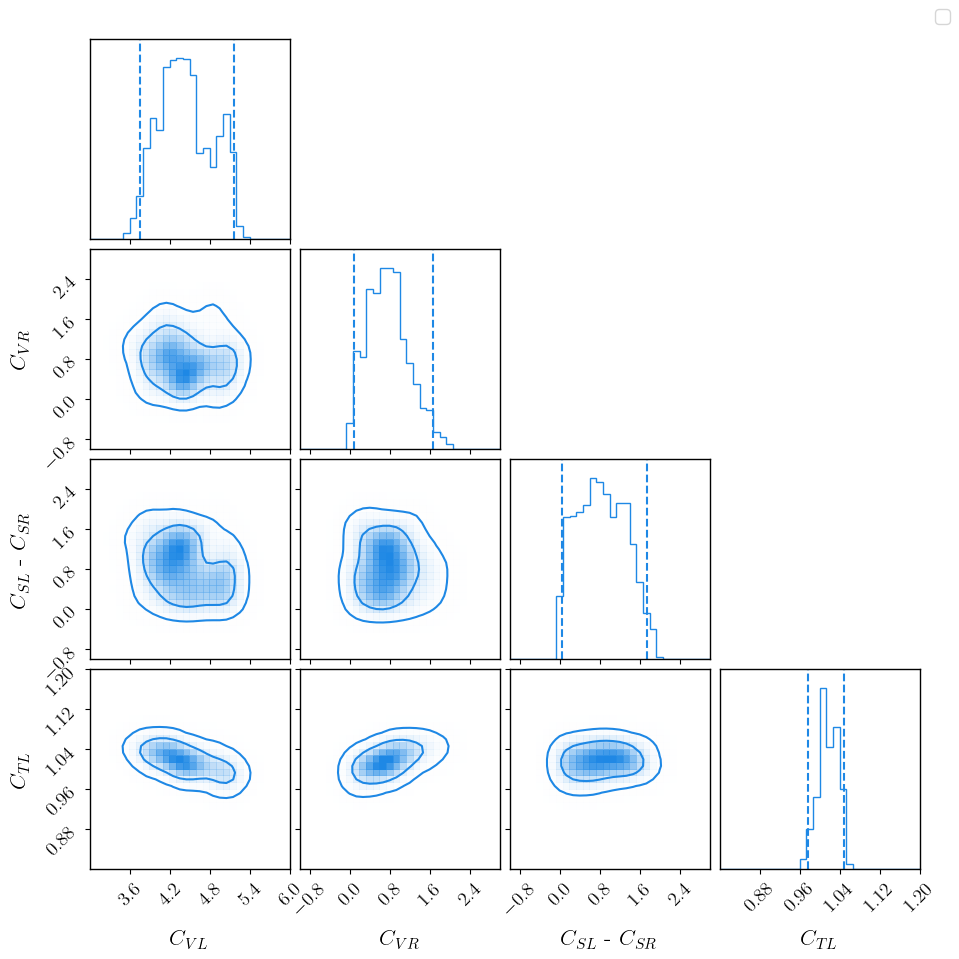

In [16]:
cvl = r'$C_{VL}$'
cvr = r'$C_{VR}$'
csl = r'$C_{SL}$'
csr = r'$C_{SR}$'
ctl = r'$C_{TL}$'
labels = [cvl, cvr, csl + ' - ' + csr, ctl]

# file = '../results/samples/posterior_corner.pdf'

fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'cvr', 'csl', 'ctl'],
                    bins=30, 
                    levels=(0.68, 0.95), 
                    quantiles=(0.025, 0.975), 
                    range = [(3, 6), (-1, 3), (-1, 3), (0.8, 1.2)],
                    smooth=1.5,
                    labels=labels,
                    color='#1E88E5',
                    plot_datapoints=False
                    );

handles, labs = fig.axes[0].get_legend_handles_labels()
by_label = dict(zip(labs, handles))
fig.legend(by_label.values(), by_label.keys())

# plt.savefig(file)
plt.show()